# Praca domowa 7+8
### Paweł Szymański

In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import nycflights13
import locale

Modyfikujemy następujący wykres z poprzedniej pracy domowej:

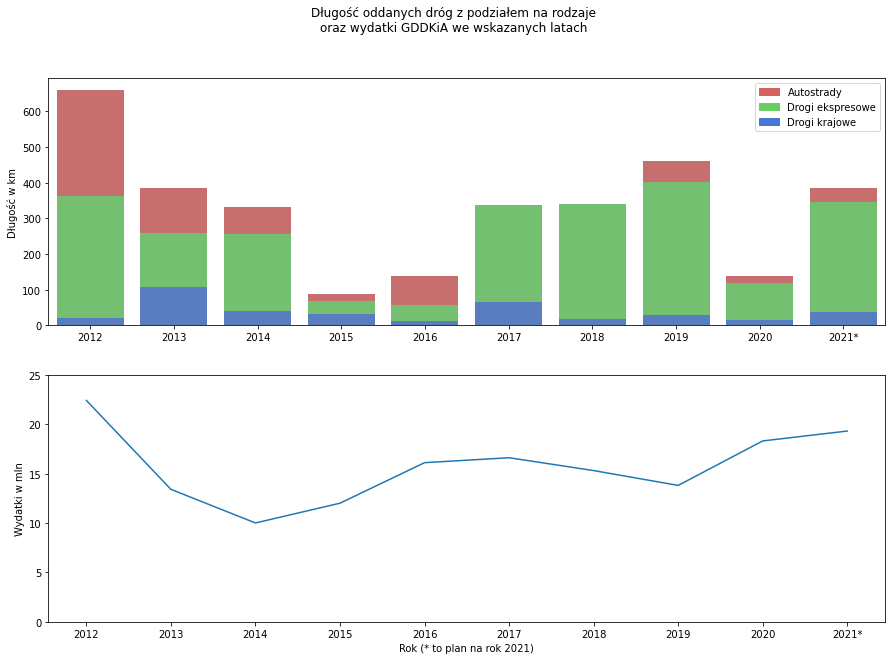

In [5]:
rok_label=[str(2012 + i) for i in range(10)]
rok_label[9]='2021*'
d={'rok': [2012 + i for i in range(10)],\
    'Autostrady': [296.6,125.1,76.3,20.8,81,0,0,57.7,18.3,39.6],\
    'Drogi ekspresowe': [343,151,215.8,34.9,43.8,273.4,323.0,373.6,104.8,308.2],\
    'Drogi krajowe': [20.4,107.9,40.4,32.3,12.4,64,17.1,28.6,14.6,37.7],\
    'wydatki': [22.4,13.4,10,12,16.1,16.6,15.3,13.8,18.3,19.3]}
df=pd.DataFrame(data=d)
longer=df[['rok','Autostrady','Drogi ekspresowe','Drogi krajowe']].melt(id_vars='rok')
longer=longer.rename(columns={'variable': 'Typ drogi','value':'Długość w km','rok':'Rok'})

fig = make_subplots(rows=2, cols=1, x_title='Rok')
fig['layout']['yaxis']['title']='Długość w km'
fig['layout']['yaxis2']['title']='Wydatki w mln'
#niestety nie ma możliwości tworzenia dowolnych subplotów kozystając z px więc trzeba dodawac serie jedna po drugiej
fig.add_trace( px.bar(longer, x="Rok", y='Długość w km', color='Typ drogi').data[0] , row=1, col=1)
fig.add_trace( px.bar(longer, x="Rok", y='Długość w km', color='Typ drogi').data[1] , row=1, col=1)
fig.add_trace( px.bar(longer, x="Rok", y='Długość w km', color='Typ drogi').data[2] , row=1, col=1)



fig.update_layout(barmode='stack',height=800, width=900, title_text="Długość oddanych dróg z podziałem na rodzaje\noraz wydatki GDDKiA we wskazanych latach")
fig.add_trace( go.Scatter( x=df["rok"], y=df["wydatki"]) , row=2, col=1)
fig['data'][3]['showlegend'] = False
fig.show()

Wykres interaktywny umożliwia nam odczytanie dokłądnych wartości z wykresów, co wcześniej było by niemożliwe. Dodatkowo możemy wybrać pojedynczy typ drogi, przez co łatwiej zobaczyć jak długość oddanych dróg zmienia sie w czasie; na oryginalnym wykresie można to było łatwo odczytać tylko dla sumarycznej długości dróg i typu drogi znajdującego się na dole wykresu kolumnowego, czyli  dróg krajowych.

------

Wykres z notatnika do laboratorium 12:

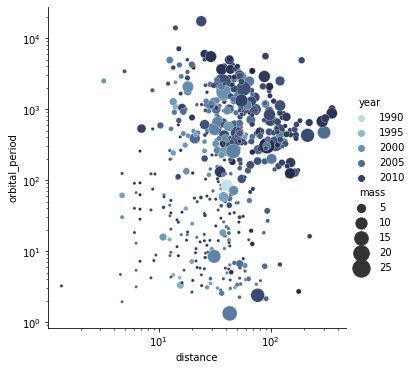

In [3]:
planets = sns.load_dataset("planets")
planets=planets.dropna()
planets['classes']=pd.cut(planets['year'], bins=[1985, 1990, 1995, 2000,2005,2010,2015],
                          labels=['1986-1990', '1991-1995', '1996-2000','2001-2005','2006-2010','2011-2015'])


fig = px.scatter(
    data_frame=planets,
    x='distance',
    y='orbital_period',
    custom_data=['method', 'mass','year'],
    color='classes',
    size='mass',
    size_max=20,
    log_x=True,
    log_y=True,
    labels={
        "distance": 'Odległość',
        "orbital_period": 'Okres orbitalny',
        'classes': 'Rok odkrycia'
    }
)

hovertemplate = "Metoda odkrycia: %{customdata[0]}<br>" +\
                "Odległość: %{x:,.2f}<br>" +\
                "Okres orbitalny: %{y:,.2f}<br>" +\
                "Masa: %{customdata[1]:,.2f}<br>"+\
                "Rok: %{customdata[2]:0f}"

fig.update_traces(
    hovertemplate=hovertemplate
)

fig.update_layout(title_text='Okres orbitalny i odległośc od gwiazdy planet odkrytych we wskazanych latach')
fig.show()

Na oryginalnym wykresie jestbardzo wiele punktów, nachodzą one na siebie co może utrudnić odczytanie z wykresu informacji na temat danej planety. Problem ten jest rozwiązany poprzez możliwość filtracji rozpatrywanych lat a także możliwość przybliżania wykresu. Etykiety danych pozwalają na dokładniejsze odczytanie wartości niż z osi, a ponadto można w nich zawrzeć dodatkowe informacje o metodzie odkrycia.

-------

Ostatni zmieniany wykres to wykres z laboratoriów 10:
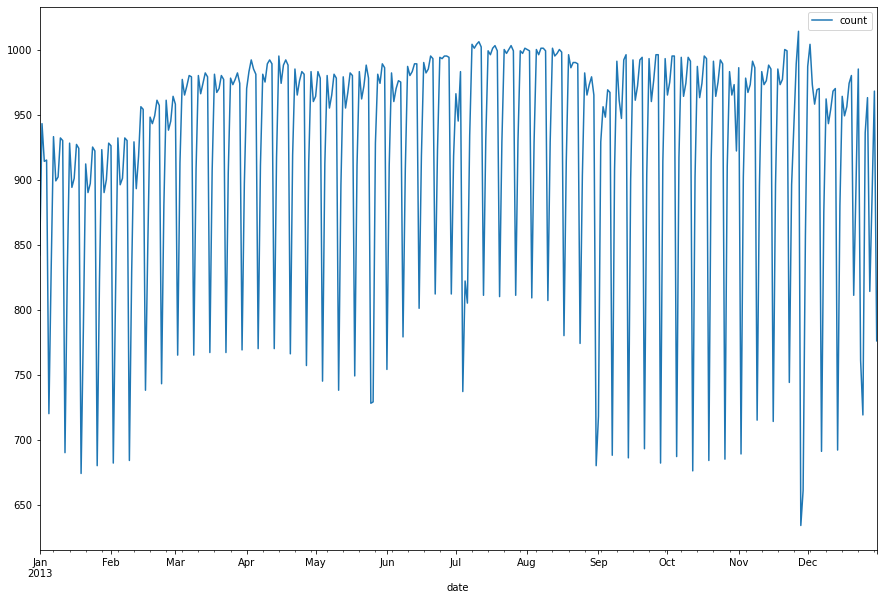

In [4]:
flights = nycflights13.flights
flights2 = flights[['year', 'month', 'day', 'hour', 'origin', 'dest', 'tailnum', 'carrier']]
flight_count = flights2.groupby(['year', 'month', 'day'])\
                .count()\
                .reset_index()\
                .drop(['origin','dest','tailnum','carrier'], axis=1)\
                .rename(columns={'hour': 'count'})
flight_count['date'] = pd.to_datetime(flight_count[['year', 'month', 'day']])
flight_count = flight_count.drop(['year', 'month', 'day'], axis=1)

#ustawiamy polskie nazwy miesięcy
locale.getlocale()
locale.setlocale(locale.LC_TIME, 'pl')

flight_count['dzien'] = [d.strftime('%A') for d in flight_count['date']]

fig=go.Figure()
tmp=px.line(flight_count,x='date',
            y='count',
           custom_data=['dzien'])
fig.add_trace(tmp.data[0])
#fig.update_layout(
 #   title_text="Ilość lotów danego dnia w roku 2013"
#)
fig.update_layout(
    title="Ilość lotów danego dnia w roku 2013",
    xaxis_title="Data",
    yaxis_title="Ilość lotów")
#dodajemy slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=7,
                    label='1 tydzien',
                    step='day',
                    stepmode='backward'),
                dict(count=1,
                     label="1 mies",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6 mies",
                     step="month",
                     stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)


hovertemplate = "Dzień: %{x|%d %b %Y}<br>" +\
                "Dzień tygodnia: %{customdata[0]}<br> "+\
                "Ilość lotów: %{y:.0f}<br>" 

fig.update_traces(
    hovertemplate=hovertemplate
)
fig


Powyższy wykres umożliwia nam na dokładne przyjrzenie się zmianom w ilości lotów w małej skali czasowej a nie tylko z całego roku, Dzięki czemu możemy dokładnie sprawdzić to czego w oryginalnym wykresie moglismy się tylko domyślać - minima na wykresie występują dokłądnie co tydzień. Dodatokowo etykiety danych pozwalają nam sprawdzić, w który dzień tygodnia występują te minima występują.